# Stratification v2

In [1]:
import sys

sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap_experiment
from utils.prop_utils import prop_probs
from utils.strat_utils import calculate_stratified_effects

In [3]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [4]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

We're using a difference of differences in revenues in 1978 and 1975:

$\beta_{k} = E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$

## Experimental Data

In [5]:
propensity_probabilities = prop_probs(
    lalonde_exp,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)
lalonde_exp = pd.merge(lalonde_exp, propensity_probabilities, on="id")

In [6]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_exp,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


In [7]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

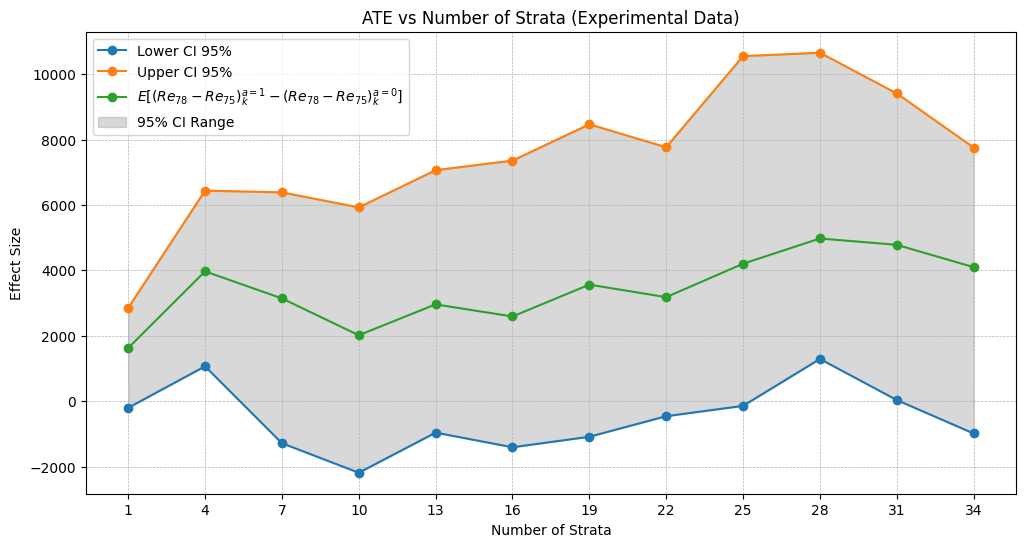

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(
    ci_df["num_strata"],
    ci_df["mean"],
    label="$E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$",
    marker="o",
)

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("ATE vs Number of Strata (Experimental Data)")
plt.legend()
plt.show()

In [9]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,1624.745761,-201.243443,2851.065307
1,4,3969.462898,1066.380003,6438.492168
2,7,3143.111361,-1283.125709,6385.567403
3,10,2017.230758,-2186.076577,5926.543829
4,13,2960.611631,-960.378727,7063.706953
5,16,2589.908067,-1407.520092,7357.017509
6,19,3563.790616,-1086.568183,8466.520751
7,22,3181.763134,-458.057816,7764.336080
8,25,4203.239930,-142.261349,10549.798070
9,28,4974.894440,1291.602540,10653.941088


## Observational Data

In [10]:
propensity_probabilities = prop_probs(
    lalonde_obs,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)
lalonde_obs = pd.merge(lalonde_obs, propensity_probabilities, on="id")

In [11]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_obs,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


In [12]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

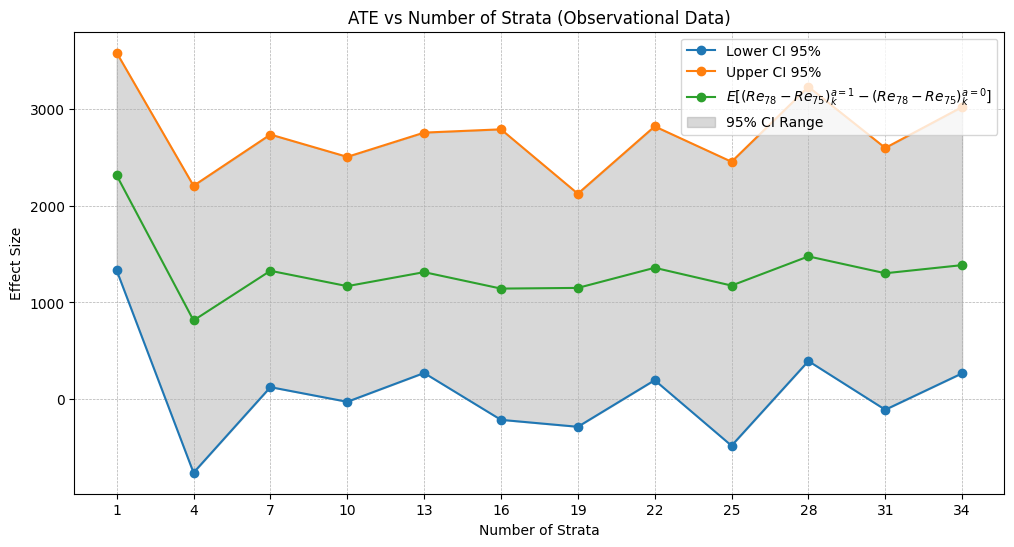

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(
    ci_df["num_strata"],
    ci_df["mean"],
    label="$E[(Re_{78} - Re_{75})^{a=1}_k - (Re_{78} - Re_{75})^{a=0}_k]$",
    marker="o",
)

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("ATE vs Number of Strata (Observational Data)")
plt.legend()
plt.show()

In [14]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,2311.951820,1330.842258,3578.346281
1,4,814.679752,-757.428766,2204.660656
2,7,1327.192257,125.971225,2733.798239
3,10,1168.644743,-25.415899,2503.295504
4,13,1313.212763,272.136382,2753.671989
5,16,1143.401392,-211.531097,2787.501600
6,19,1150.461488,-283.318051,2122.993612
7,22,1358.240444,197.792299,2817.980197
8,25,1174.560311,-478.579587,2452.708683
9,28,1475.895470,395.399155,3226.108017


Our estimates here are less biased.